In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib

In [3]:
dirctl='/dhobyghaut/grandey/data5/cesm/s2s/'
pptcu2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECC.nc')
pptcl2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECL.nc')
# print(pptcu2k)
pptcueas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECC.nc')
pptcleas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECL.nc')

# wind=xr.open_dataset(dirctl+'p17d_b_eas0/atm/')
#ppt data is in m/s. convert to mm/day *60*60*24*1000 = *86400000
units=60*60*24*1000
#latmin=-8.30
#latmax=33.98
latmin=2.92
latmax=24.18
lonmin=81.9 #80.66
lonmax=124.17 #125.42
starttime=12*40
#comment out this section below if you want global data
pptcl2k=pptcl2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcu2k=pptcu2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcleas0=pptcleas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcueas0=pptcueas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
#comment out section above if you want global data
t,nlat,nlon=np.shape(pptcl2k.PRECL)
lons=pptcl2k.lon
lats=pptcl2k.lat



/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


<xarray.DataArray 'lat' (lat: 22)>
array([ -6.631579,  -4.736842,  -2.842105,  -0.947368,   0.947368,   2.842105,
         4.736842,   6.631579,   8.526316,  10.421053,  12.315789,  14.210526,
        16.105263,  18.      ,  19.894737,  21.789474,  23.684211,  25.578947,
        27.473684,  29.368421,  31.263158,  33.157895])
Coordinates:
  * lat      (lat) float64 -6.632 -4.737 -2.842 -0.9474 0.9474 2.842 4.737 ...
Attributes:
    long_name:  latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 18)>
array([  82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,  100. ,  102.5,
        105. ,  107.5,  110. ,  112.5,  115. ,  117.5,  120. ,  122.5,  125. ])
Coordinates:
  * lon      (lon) float64 82.5 85.0 87.5 90.0 92.5 95.0 97.5 100.0 102.5 ...
Attributes:
    long_name:  longitude
    units:      degrees_east
480


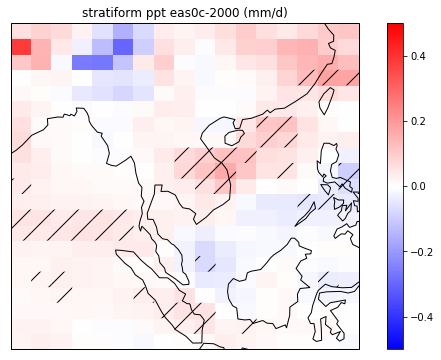

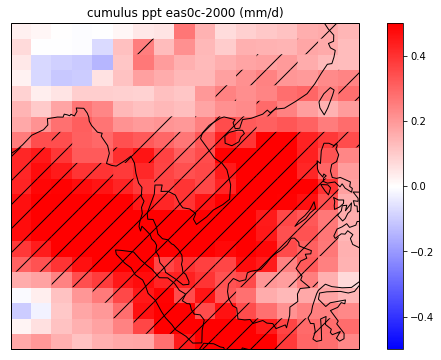

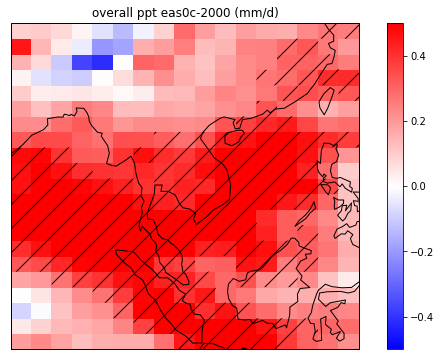

In [7]:
print(pptcu2k.lat)
print(pptcueas0.lon)
print(starttime)


t1,p1 = ttest_ind(pptcleas0.PRECL[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0.PRECC[starttime:,:,:],pptcu2k.PRECC[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:]+pptcu2k.PRECC[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)


plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
plt.figure(1)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcl2k.lon,pptcl2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('stratiform ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp1, hatch='/', alpha=0.)

plt.figure(2)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcueas0.PRECC[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('cumulus ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp2, hatch='/', alpha=0.)


plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('overall ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp3, hatch='/', alpha=0.)
# plt.figtext(.02, .02, 'domain mean is {}'.format(np.mean(pptcleas0.PRECL+pptcueas0.PRECC-pptcl2k.PRECL-pptcu2k.PRECC)))
plt.show()

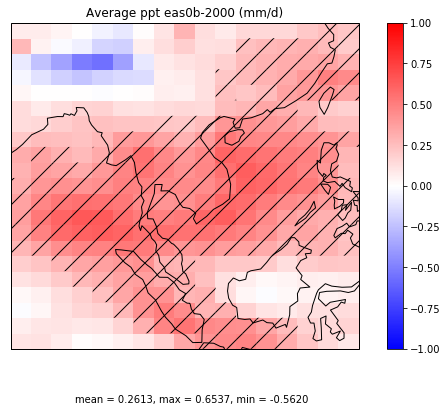

In [8]:
#seasonal outputs. 0=jan ... 11=dec

pptcl2ka=pptcl2k.PRECL.data.reshape((-1,12,nlat,nlon))
pptcl2kb=pptcl2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcu2ka=pptcu2k.PRECC.data.reshape((-1,12,nlat,nlon))
pptcu2kb=pptcu2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcleas0a=pptcleas0.PRECL.data.reshape((-1,12,nlat,nlon))
pptcleas0b=pptcleas0a[:,:,:,:].reshape((-1,nlat,nlon))
pptcueas0a=pptcueas0.PRECC.data.reshape((-1,12,nlat,nlon))
pptcueas0b=pptcueas0a[:,:,:,:].reshape((-1,nlat,nlon))

#ignore transient period 3*40yrs
starttime=120

t1,p1 = ttest_ind(pptcleas0b[starttime:,:,:],pptcl2kb[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0b[starttime:,:,:],pptcu2kb[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:],pptcl2kb[starttime:,:,:]+pptcu2kb[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)

# plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
# plt.figure(1)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcleas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('stratiform ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp1, hatch='/', alpha=0.)

# plt.figure(2)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcueas0b[starttime:,:,:]-pptcu2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('cumulus ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp2, hatch='/', alpha=0.)

netdiff=pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:]-pptcu2kb[starttime:,:,:]
plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,np.mean(netdiff,axis=0)*units,cmap='bwr',vmax=1,vmin=-1)
ax=plt.gca()
ax.set_title('Average ppt eas0b-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(lons, lats, pp3, hatch='/', alpha=0.)
plt.figtext(0.35,0,'mean = {:.4f}, max = {:.4f}, min = {:.4f}'.format(units*np.mean(netdiff),\
                                                     units*np.max(np.mean(netdiff,axis=0)),\
                                                     units*np.min(np.mean(netdiff,axis=0))))
plt.show()

# Comparison with wrf downscalling

(60, 11, 17)
month = 1
CESM mean=1.6977,var=3.8328. WRF27km mean=2.7108,var=20.0393. WRF9km mean=0.9552,var=2.4474


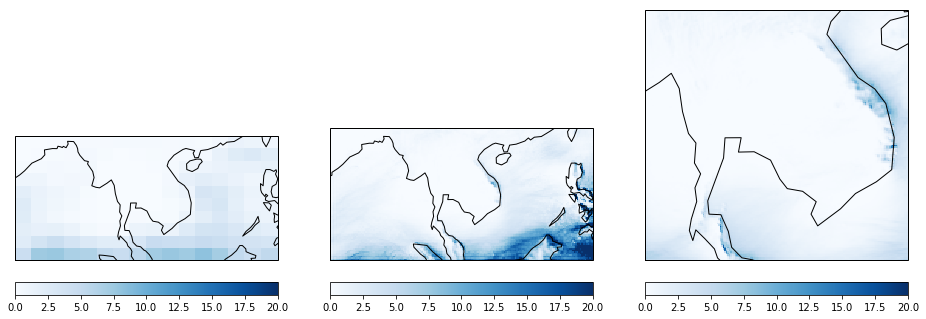

month = 2
CESM mean=nan,var=nan. WRF27km mean=1.0962,var=3.3435. WRF9km mean=0.5958,var=0.7771


/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


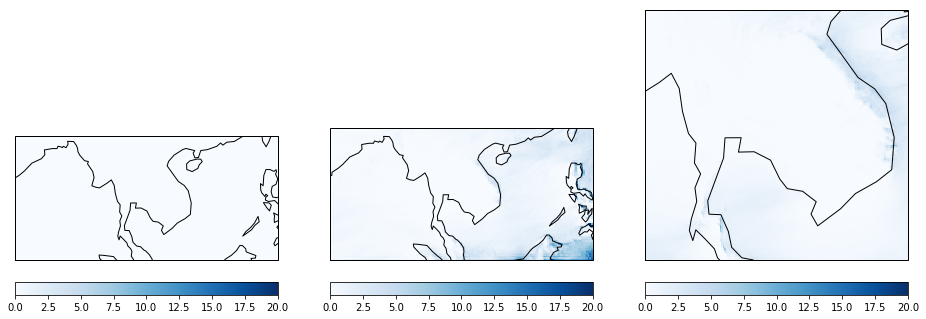

month = 3
CESM mean=0.8022,var=0.4680. WRF27km mean=1.0214,var=2.7911. WRF9km mean=0.8372,var=0.6342


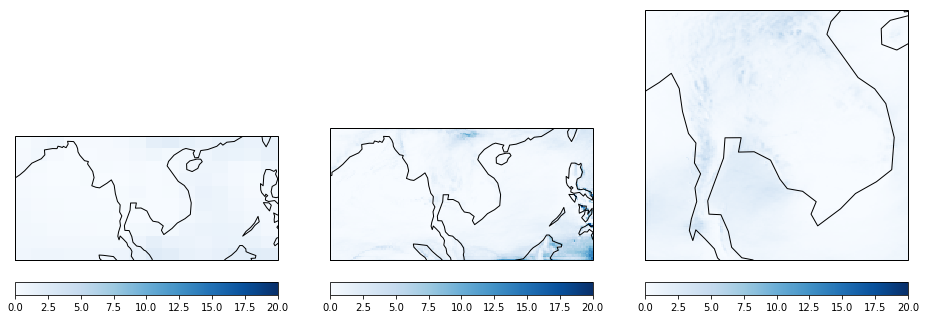

month = 4
CESM mean=1.2117,var=1.6770. WRF27km mean=1.3760,var=4.5842. WRF9km mean=1.0446,var=0.7621


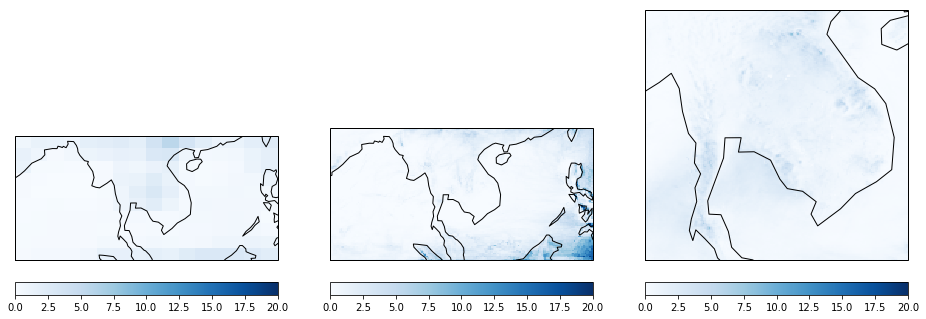

month = 5
CESM mean=2.4688,var=3.3207. WRF27km mean=3.0594,var=16.4704. WRF9km mean=2.9273,var=6.1585


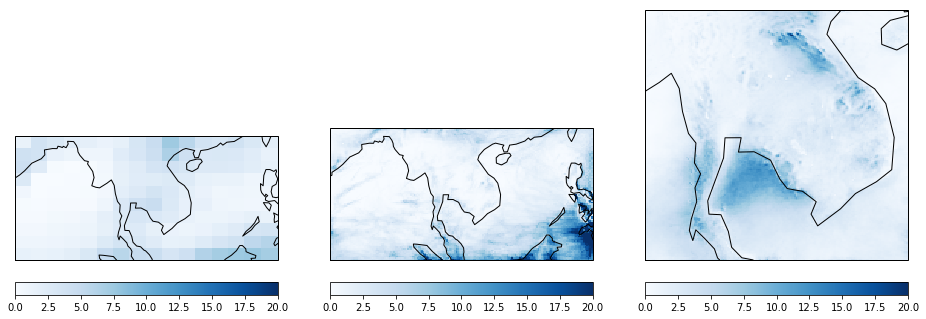

month = 6
CESM mean=6.0808,var=10.6231. WRF27km mean=7.4573,var=25.6882. WRF9km mean=6.3216,var=24.0086


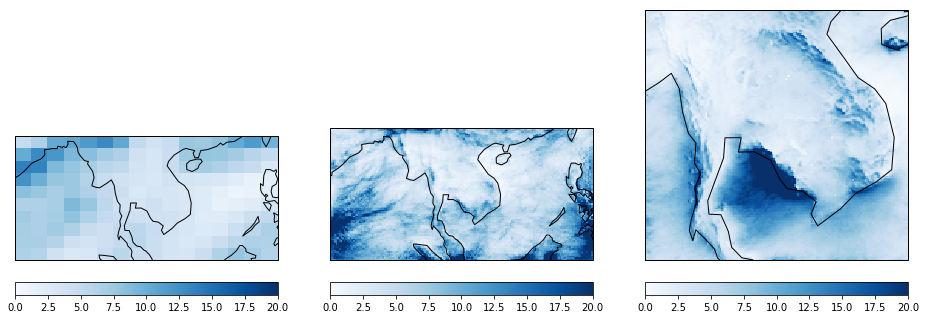

month = 7
CESM mean=7.1142,var=7.2407. WRF27km mean=12.8885,var=37.2927. WRF9km mean=13.3594,var=54.0219


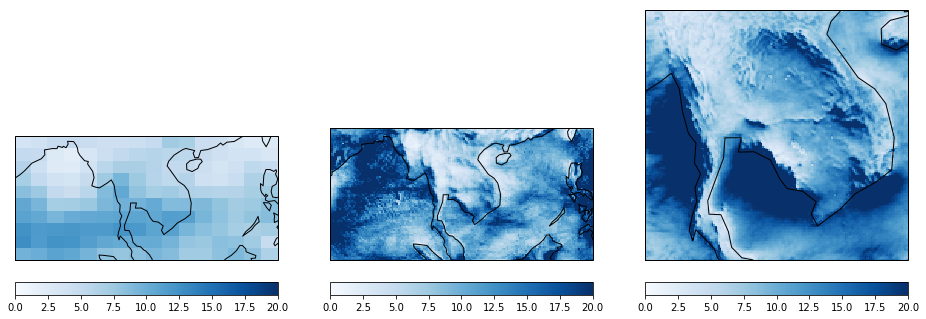

month = 8
CESM mean=9.2615,var=14.7599. WRF27km mean=15.1647,var=41.7361. WRF9km mean=15.2917,var=61.7460


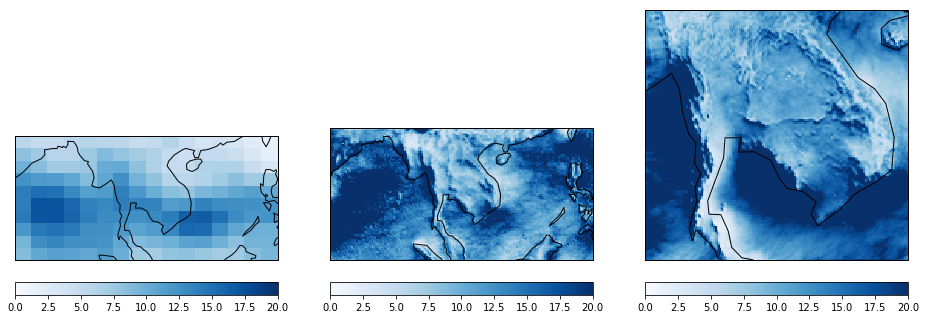

month = 9
CESM mean=8.1495,var=6.6320. WRF27km mean=12.7304,var=30.2487. WRF9km mean=14.4307,var=63.2353


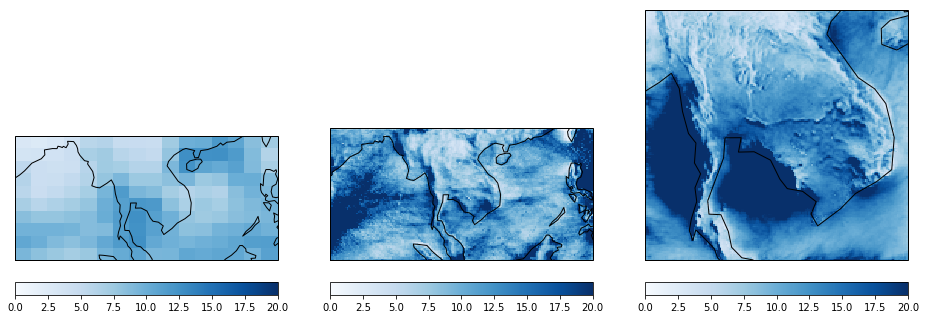

month = 10
CESM mean=7.5741,var=9.6561. WRF27km mean=11.5089,var=39.4330. WRF9km mean=12.2256,var=83.1205


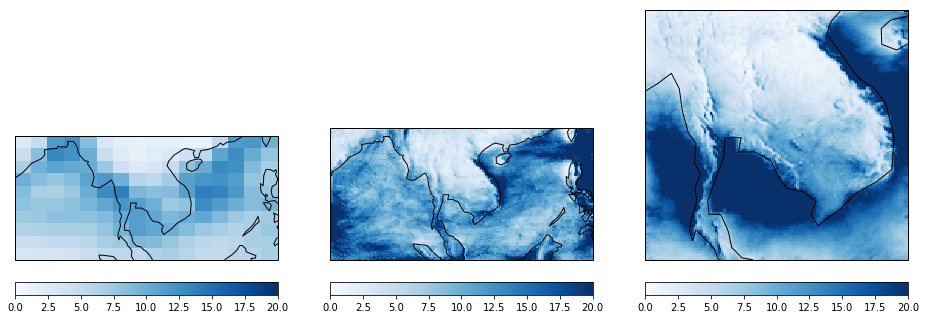

month = 11
CESM mean=5.8848,var=20.2539. WRF27km mean=10.1868,var=77.7793. WRF9km mean=7.4518,var=74.7667


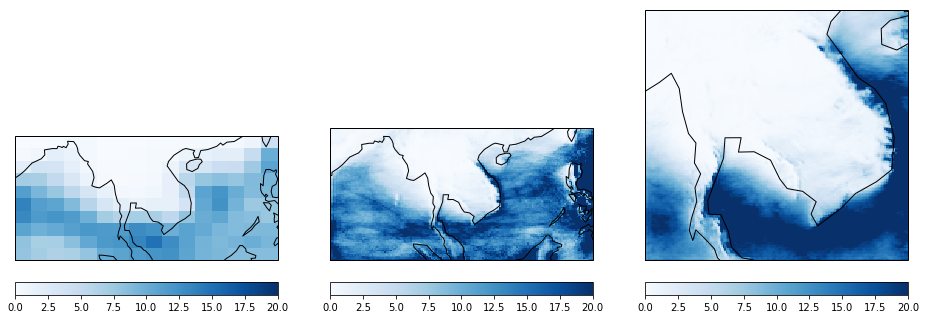

month = 12
CESM mean=5.7303,var=45.5243. WRF27km mean=8.2092,var=80.8530. WRF9km mean=4.3292,var=37.7424


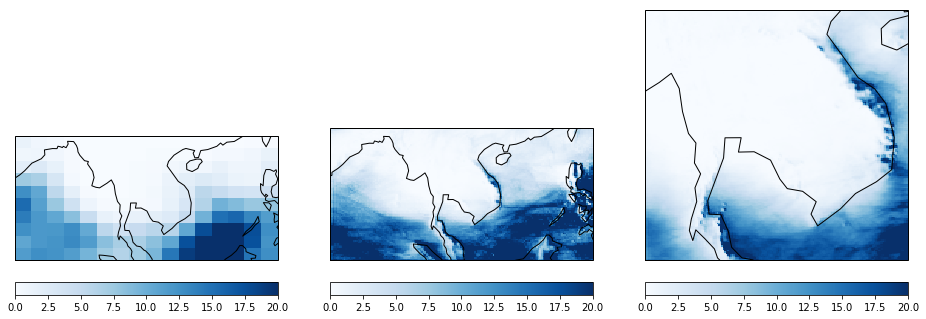

In [30]:
plt.rcParams["figure.figsize"] = 16,8
wrfout=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d01.nc')
wrfout2=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d02.nc')
wrfppt=wrfout.PPT.resample('1M',dim='time',how='mean')
wrfppt2=wrfout2.PPT.resample('1M',dim='time',how='mean')
cesmpptout=pptcu2k.PRECC[89*12:94*12]+pptcl2k.PRECL[89*12:94*12]
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M').to_timestamp()
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
cesmppt=cesmpptoutput.resample('1M',dim='time',how='mean')
print(np.shape(cesmppt))
for tt in range(0,12):
    print('month = '+str(tt+1))
    plt.figure(tt)
    ax1=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
    ax1.pcolor(lons, lats,cesmppt[tt,:,:]*units,vmin=0,vmax=20,cmap='Blues')
    ax1.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05, orientation='horizontal')
    ax2=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
    ax2.pcolor(wrfout.lon,wrfout.lat,wrfppt[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax2.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05, orientation='horizontal')
    ax3=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
    ax3.pcolor(wrfout2.lon,wrfout2.lat,wrfppt2[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax3.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax3,fraction=0.04, pad=0.05, orientation='horizontal')
    print('CESM mean={:.4f},var={:.4f}. WRF27km mean={:.4f},var={:.4f}. WRF9km mean={:.4f},var={:.4f}'.format \
          (float(np.mean(cesmppt[tt,:,:]*units)),float(np.var(cesmppt[tt,:,:]*units)),float(np.mean(wrfppt[tt,:,:])), \
           float(np.var(wrfppt[tt,:,:])),float(np.mean(wrfppt2[tt,:,:])),float(np.var(wrfppt2[tt,:,:]))))
    plt.show()

In [68]:

print(cesmpptout)
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M')
timess=timess.to_timestamp()
# print(timess)
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
print(cesmpptoutput)


<xarray.DataArray (time: 60, lat: 11, lon: 17)>
array([[[  5.210526e-08,   8.631764e-08, ...,   6.226972e-08,   9.122224e-08],
        [  2.640589e-08,   4.208907e-08, ...,   4.016912e-08,   5.648607e-08],
        ..., 
        [  3.802048e-10,   6.268231e-10, ...,   8.425056e-09,   5.288226e-09],
        [  1.971630e-10,   3.496047e-10, ...,   1.667534e-09,   2.861187e-09]],

       [[  1.178704e-08,   1.399470e-08, ...,   2.293616e-08,   1.982005e-08],
        [  9.912434e-09,   9.610786e-09, ...,   1.269580e-08,   1.092304e-08],
        ..., 
        [  1.325866e-09,   2.552055e-09, ...,   2.364436e-08,   3.197993e-08],
        [  2.200818e-09,   1.356532e-09, ...,   2.287222e-08,   4.320303e-08]],

       ..., 
       [[  8.544765e-08,   8.556219e-08, ...,   7.978110e-08,   8.947058e-08],
        [  6.746302e-08,   7.443072e-08, ...,   9.880945e-08,   9.740438e-08],
        ..., 
        [  1.044637e-08,   2.889639e-08, ...,   5.727041e-08,   7.433052e-08],
        [  1.430670e-08,

In [12]:
ts2000a=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.TS.nc')
# print(pptcu2k)
tseas0ca=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.TS.nc')
ts2000=ts2000a.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
tseas0c=tseas0ca.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))

/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


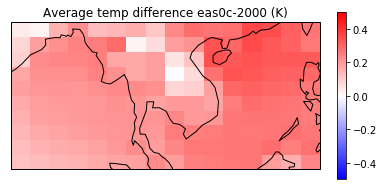

<xarray.DataArray 'TS' ()>
array(0.26043701171875)


In [30]:
tsdiff=np.mean(tseas0c.TS,axis=0)-np.mean(ts2000.TS,axis=0)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,tsdiff,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('Average temp difference eas0c-2000 (K)')
ax.coastlines()
cmap = plt.get_cmap('bwr')
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5))
sm._A = []
plt.colorbar(sm,ax=ax,fraction=0.025, pad=0.05)
plt.show()
print(np.mean(tseas0c.TS)-np.mean(ts2000.TS))

In [9]:
np.set_printoptions(threshold=np.inf)
# a = np.asarray([i for i in range(24) for _ in range(0)]).reshape((24, 3, 3))
# print(a)
# aa = a.reshape((-1,3,4,3,3))
# print(aa[:,:,2,:,:].reshape((-1,3,3)))
a=np.asarray([i for i in range(24) for _ in range(9)])
aa=a.reshape((24,3,3))
print(aa)
aaa=aa.reshape((-1,12,3,3))
print(np.shape(aaa))
print(aaa[:,5:8,:,:].reshape((-1,3,3)))

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]]

 [[13 13 13]
  [13 13 13]
  [13 13 13]]

 [[14 14 14]
  [14 14 14]
  [14 14 14]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]]

 [[18 18 18]
  [18 18 18]
  [18 18 18]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]]

 [[22 22 22]
  [22 22 22]
  [22 22 22]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]]]
(2, 12, 3, 3)
[[